In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
%matplotlib inline

sns.set_style('darkgrid')
# sns.set_context('notebook')
# sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('data/housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


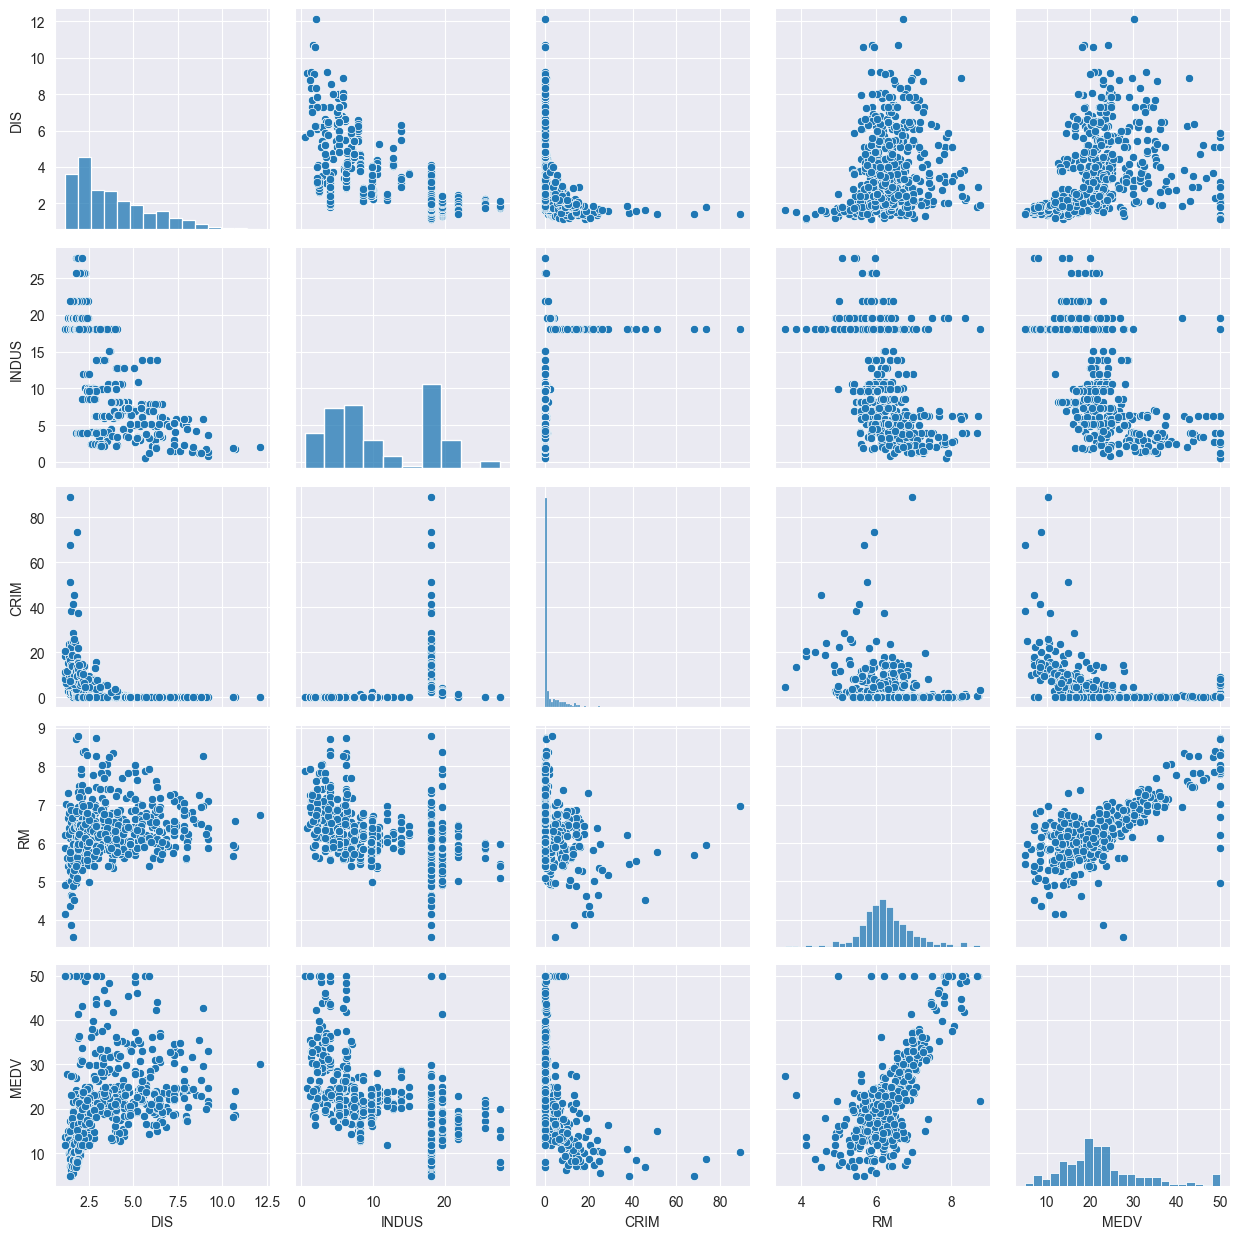

In [4]:
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

<AxesSubplot: >

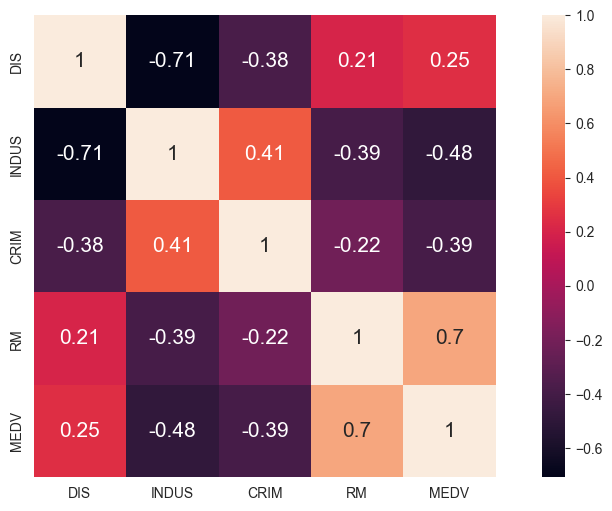

In [5]:
sns.heatmap(
    df[cols].corr(),
    annot=True,
    # cmap='RdYlGn',
    square=True,
    cbar=True,
    annot_kws={'size': 15}

)

## Creando el modelo

In [6]:
X = df[['RM']].values
y = df['MEDV'].values

X.shape, y.shape

((506, 1), (506,))

In [35]:
scaler = StandardScaler()

scaler_x = scaler.fit(X)
X_std = scaler_x.transform(X)

scaler_y = scaler.fit(y.reshape(-1, 1))
y_std = scaler_y.transform(y.reshape(-1, 1))

In [36]:
lr = LinearRegression()

model = lr.fit(X_std, y_std)

In [37]:
print(f'Coef_: {model.coef_[0][0]}')
print(f'Intercept_: {model.intercept_[0]}')

Coef_: 0.6953599470715391
Intercept_: -4.4389206106451733e-16


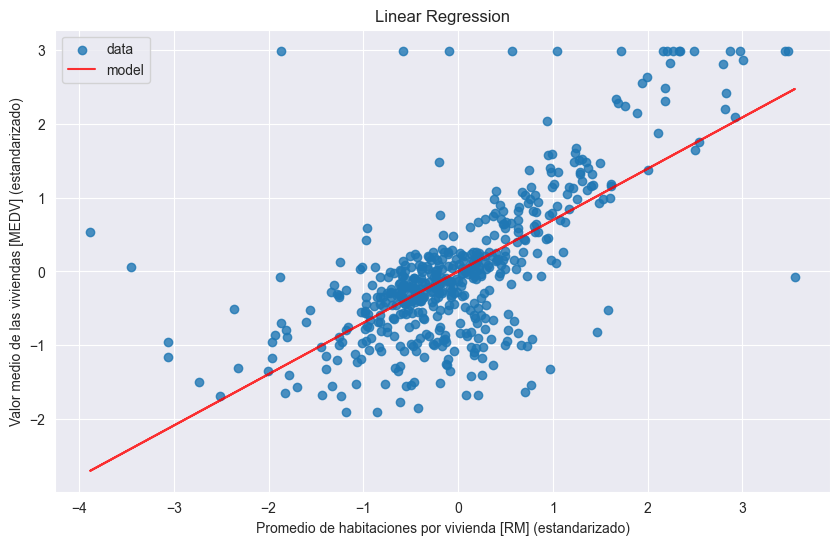

In [38]:
plt.scatter(X_std, y_std, alpha=.8, label='data')
plt.plot(X_std, model.predict(X_std), color='red', alpha=.8, label='model')
plt.title('Linear Regression')
plt.xlabel('Promedio de habitaciones por vivienda [RM] (estandarizado)')
plt.ylabel('Valor medio de las viviendas [MEDV] (estandarizado)')
plt.legend()
plt.show()



## Generando predicciones

In [42]:
num_rooms = 5
num_rooms_std = scaler_x.transform([[num_rooms]])

In [43]:
pred = scaler_y.inverse_transform(model.predict(num_rooms_std))
print(f'Predicción: {pred[0][0]}')

Predicción: 10.341195046561525


In [49]:
print(f'El precio de una vivienda con {num_rooms} habitaciones es de ${pred[0][0]:.2f}')

El precio de una vivienda con 5 habitaciones es de $10.34
